In [3]:
import urllib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as plt
%matplotlib inline
from pandas import Series
from pandas import DataFrame
#from pandas.tools.plotting import scatter_matrix
from pandas.plotting import scatter_matrix

from pylab import rcParams
import scipy as sp
import seaborn as sns
import xgboost as xgb

from scipy.stats.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

import sklearn
from sklearn import preprocessing
from sklearn import decomposition
from sklearn import neighbors

from sklearn.preprocessing import scale
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from scipy.special import boxcox1p
import scipy.stats.stats as stats


from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import model_selection

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet


from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.compose import ColumnTransformer

from sklearn.externals import joblib

from collections import Counter
from sklearn import datasets

from IPython.display import Image
from IPython.core.display import HTML

This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:

BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
BLOCK; LOT: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE: The type of building at various points in time. See the glossary linked to below.
For further reference on individual fields see the Glossary of Terms. For the building classification codes see the Building Classifications Glossary.

Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:

Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.
This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual.

In [108]:
data=pd.read_csv('nyc-rolling-sales.csv')
data.drop(columns='Unnamed: 0',inplace=True)

data.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


# Data exploration

In [5]:
# data types
data.dtypes
# several features will be recoded from object to numerical (float) and visa versa 
# There are some features that need to be converted to the proper type

BOROUGH                            int64
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                              int64
LOT                                int64
EASE-MENT                         object
BUILDING CLASS AT PRESENT         object
ADDRESS                           object
APARTMENT NUMBER                  object
ZIP CODE                           int64
RESIDENTIAL UNITS                  int64
COMMERCIAL UNITS                   int64
TOTAL UNITS                        int64
LAND SQUARE FEET                  object
GROSS SQUARE FEET                 object
YEAR BUILT                         int64
TAX CLASS AT TIME OF SALE          int64
BUILDING CLASS AT TIME OF SALE    object
SALE PRICE                        object
SALE DATE                         object
dtype: object

In [106]:
data.shape

(84548, 21)

In [41]:
#convert select columns to numerical
data[["LAND SQUARE FEET", "GROSS SQUARE FEET","SALE PRICE"]] = data[["LAND SQUARE FEET", "GROSS SQUARE FEET","SALE PRICE"]].apply(pd.to_numeric, errors='coerce')

In [42]:
columns=['ZIP CODE',]
data['ZIP CODE']=data['ZIP CODE'].astype('object')
data.dtypes

BOROUGH                             int64
NEIGHBORHOOD                       object
BUILDING CLASS CATEGORY            object
TAX CLASS AT PRESENT               object
BLOCK                               int64
LOT                                 int64
EASE-MENT                          object
BUILDING CLASS AT PRESENT          object
ADDRESS                            object
APARTMENT NUMBER                   object
ZIP CODE                           object
RESIDENTIAL UNITS                   int64
COMMERCIAL UNITS                    int64
TOTAL UNITS                         int64
LAND SQUARE FEET                  float64
GROSS SQUARE FEET                 float64
YEAR BUILT                          int64
TAX CLASS AT TIME OF SALE           int64
BUILDING CLASS AT TIME OF SALE     object
SALE PRICE                        float64
SALE DATE                          object
dtype: object

In [43]:
data['SALE DATE']=pd.to_datetime(data['SALE DATE'])

In [44]:
# view missing data
data.isnull().sum()/len(data)*100
#Issue, some records are missing sales price

BOROUGH                            0.000000
NEIGHBORHOOD                       0.000000
BUILDING CLASS CATEGORY            0.000000
TAX CLASS AT PRESENT               0.000000
BLOCK                              0.000000
LOT                                0.000000
EASE-MENT                          0.000000
BUILDING CLASS AT PRESENT          0.000000
ADDRESS                            0.000000
APARTMENT NUMBER                   0.000000
ZIP CODE                           0.000000
RESIDENTIAL UNITS                  0.000000
COMMERCIAL UNITS                   0.000000
TOTAL UNITS                        0.000000
LAND SQUARE FEET                  31.049818
GROSS SQUARE FEET                 32.658372
YEAR BUILT                         0.000000
TAX CLASS AT TIME OF SALE          0.000000
BUILDING CLASS AT TIME OF SALE     0.000000
SALE PRICE                        17.222170
SALE DATE                          0.000000
dtype: float64

# Data visualization

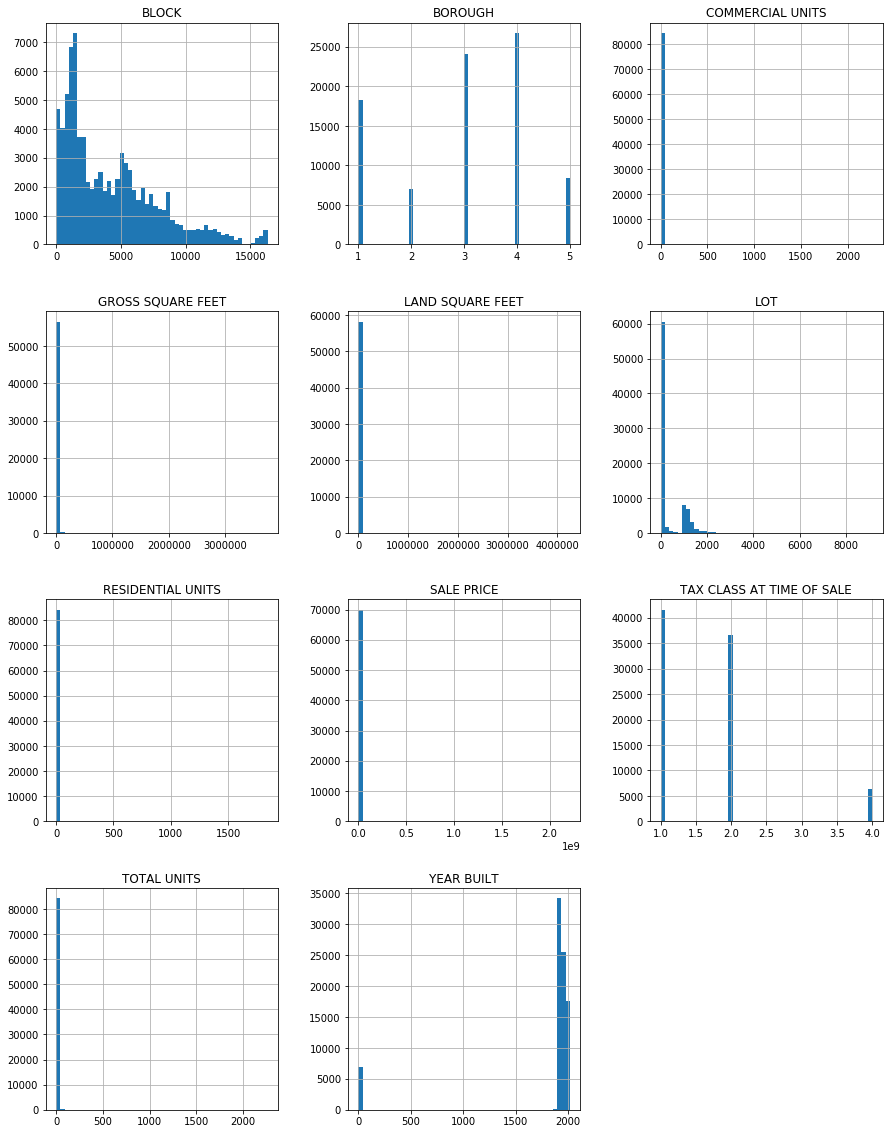

In [11]:
data.hist(bins=50,figsize=(15,20))

plt.show()

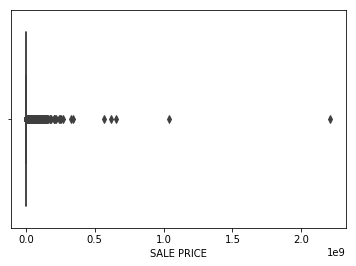

In [12]:
sns.boxplot(data['SALE PRICE'])

C:\Users\mailm_000\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


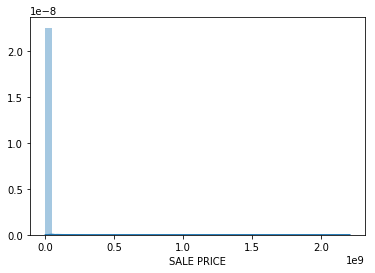

In [13]:
df = data.copy().fillna(axis=0,value=0)
sns.distplot(df['SALE PRICE'], hist=True)

In [12]:
data.describe()

,BOROUGH,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,5.829600e+04,5.693600e+04,84548.000000,84548.000000,6.998700e+04
mean,2.998758,4237.218976,376.224015,2.025264,0.193559,2.249184,3.941676e+03,4.045707e+03,1789.322976,1.657485,1.276456e+06
std,1.289790,3568.263407,658.136814,16.721037,8.713183,18.972584,4.198397e+04,3.503249e+04,537.344993,0.819341,1.140526e+07
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000e+00
25%,2.000000,1322.750000,22.000000,0.000000,0.000000,1.000000,1.650000e+03,1.046750e+03,1920.000000,1.000000,2.250000e+05
50%,3.000000,3311.000000,50.000000,1.000000,0.000000,1.000000,2.325000e+03,1.680000e+03,1940.000000,2.000000,5.300000e+05
75%,4.000000,6281.000000,1001.000000,2.000000,0.000000,2.000000,3.500000e+03,2.560000e+03,1965.000000,2.000000,9.500000e+05
max,5.000000,16322.000000,9106.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,4.000000,2.210000e+09


In [13]:
def plot_new_feature_distribution(df1,features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, axis = plt.subplots(8,6,figsize=(30,30))
    axis = axis.flatten()

    
    for feature in features:
        i += 1
        plt.subplot(8,6,i)
        sns.countplot(y=df1[feature],data=df1)
        #plt.xlabel(feature, fontsize=11)
        #locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=8)
        plt.tick_params(axis='y', which='major', labelsize=8)
    plt.show();
    
    


<Figure size 432x288 with 0 Axes>

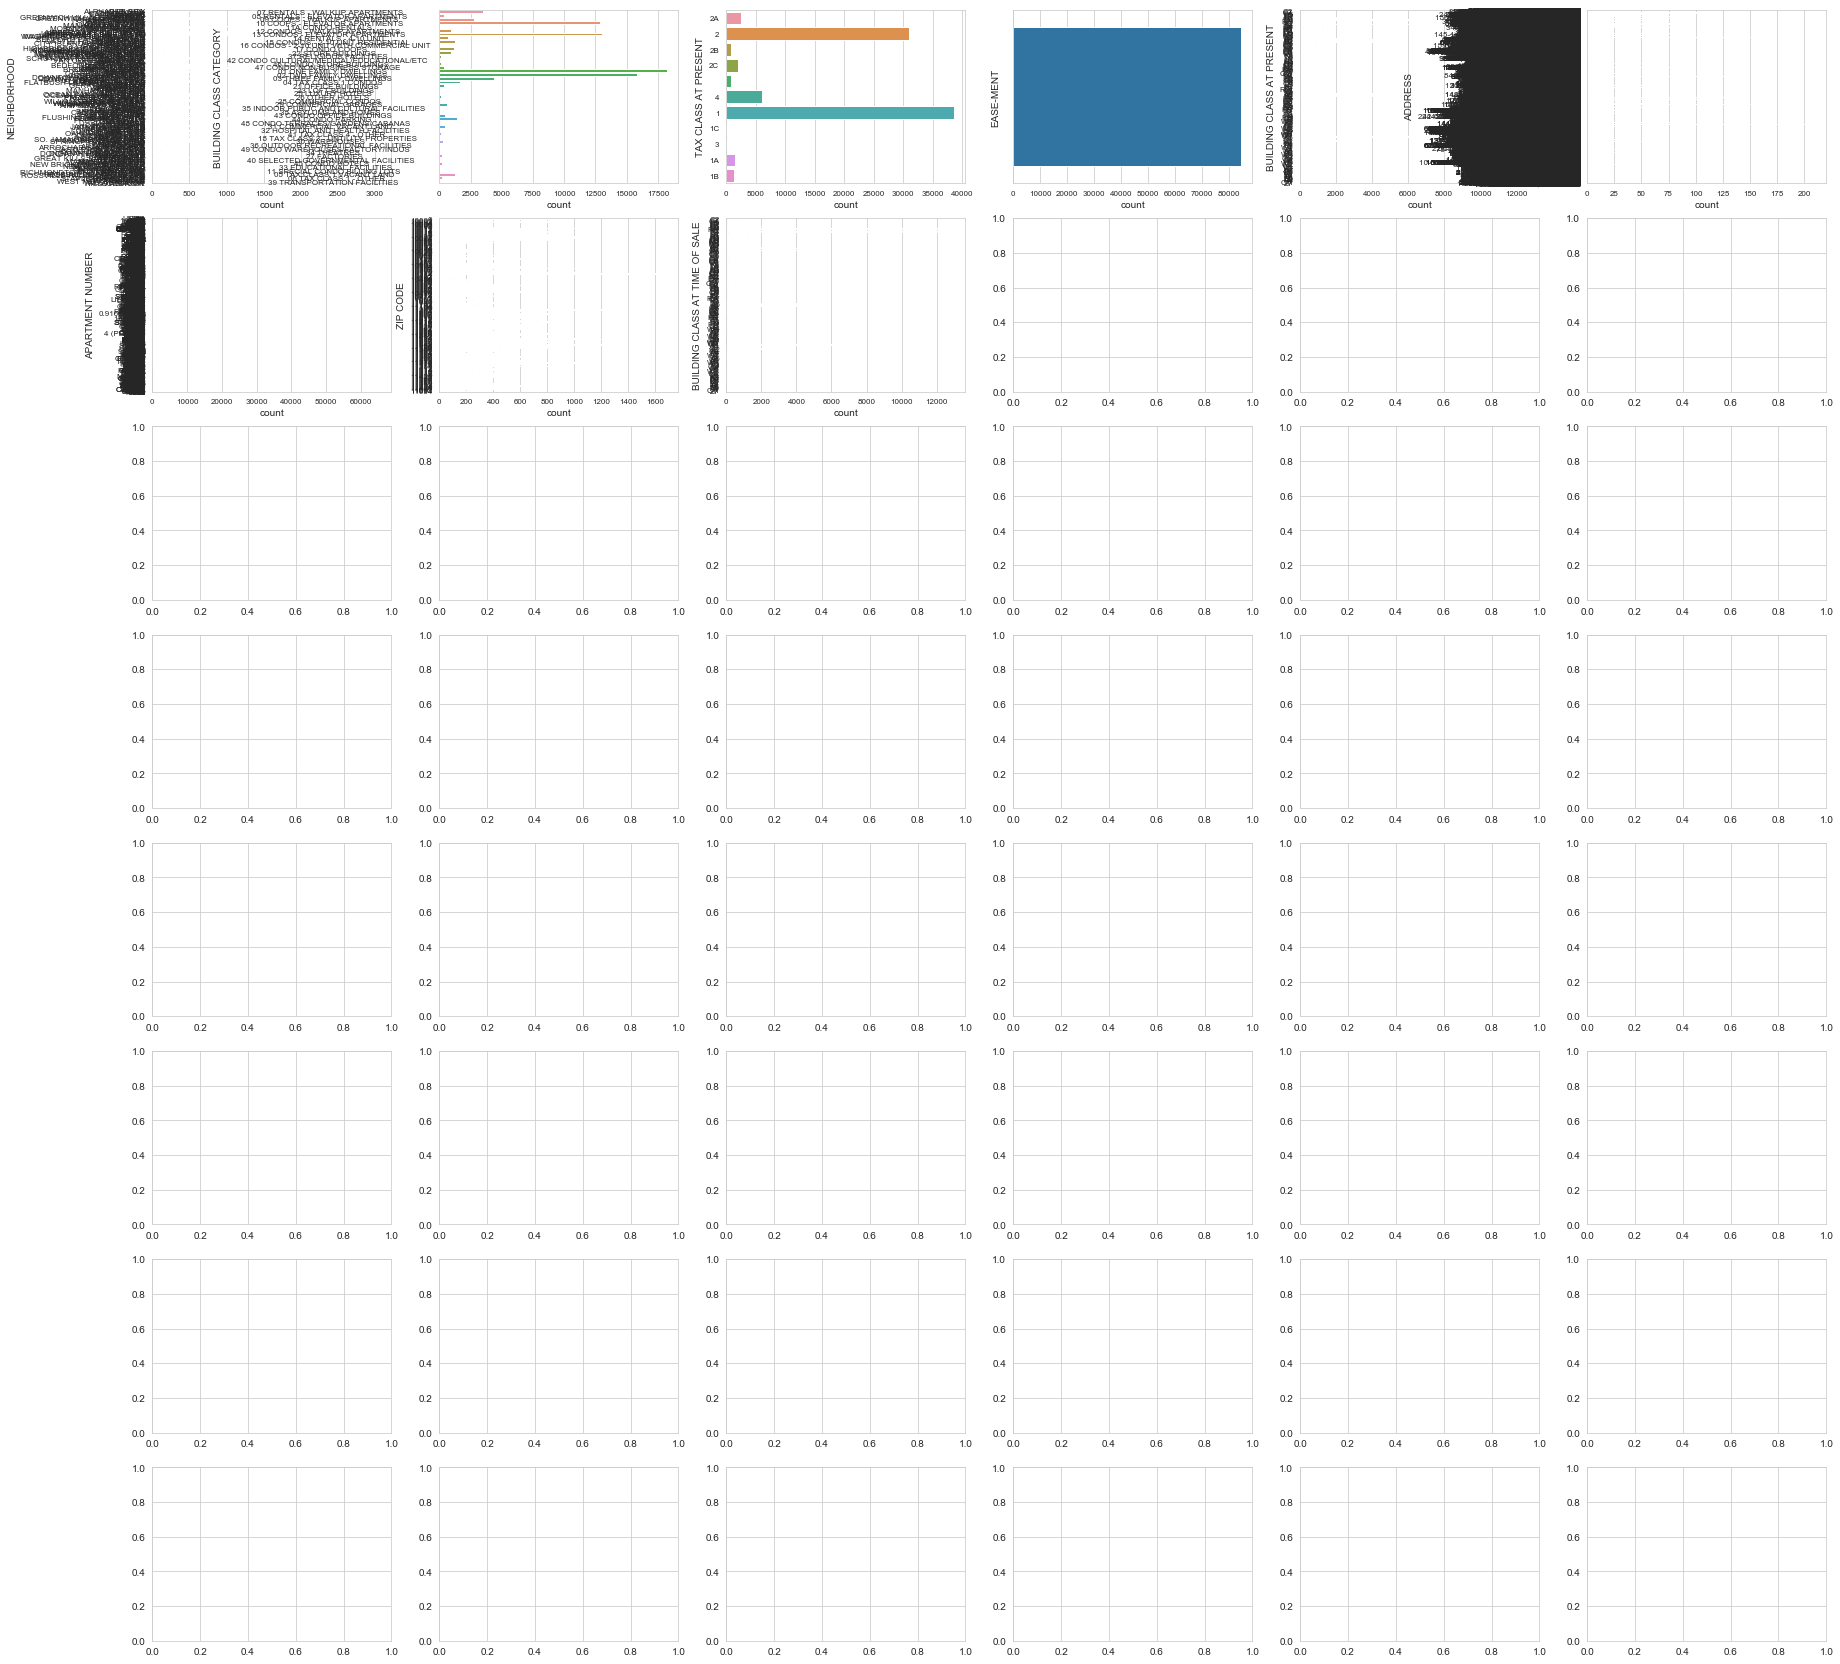

In [14]:
#call the function to plot the categorical features

cat_attrib= data.select_dtypes(include=['object'])
features=cat_attrib.columns.values[0:]

plot_new_feature_distribution(cat_attrib,features)

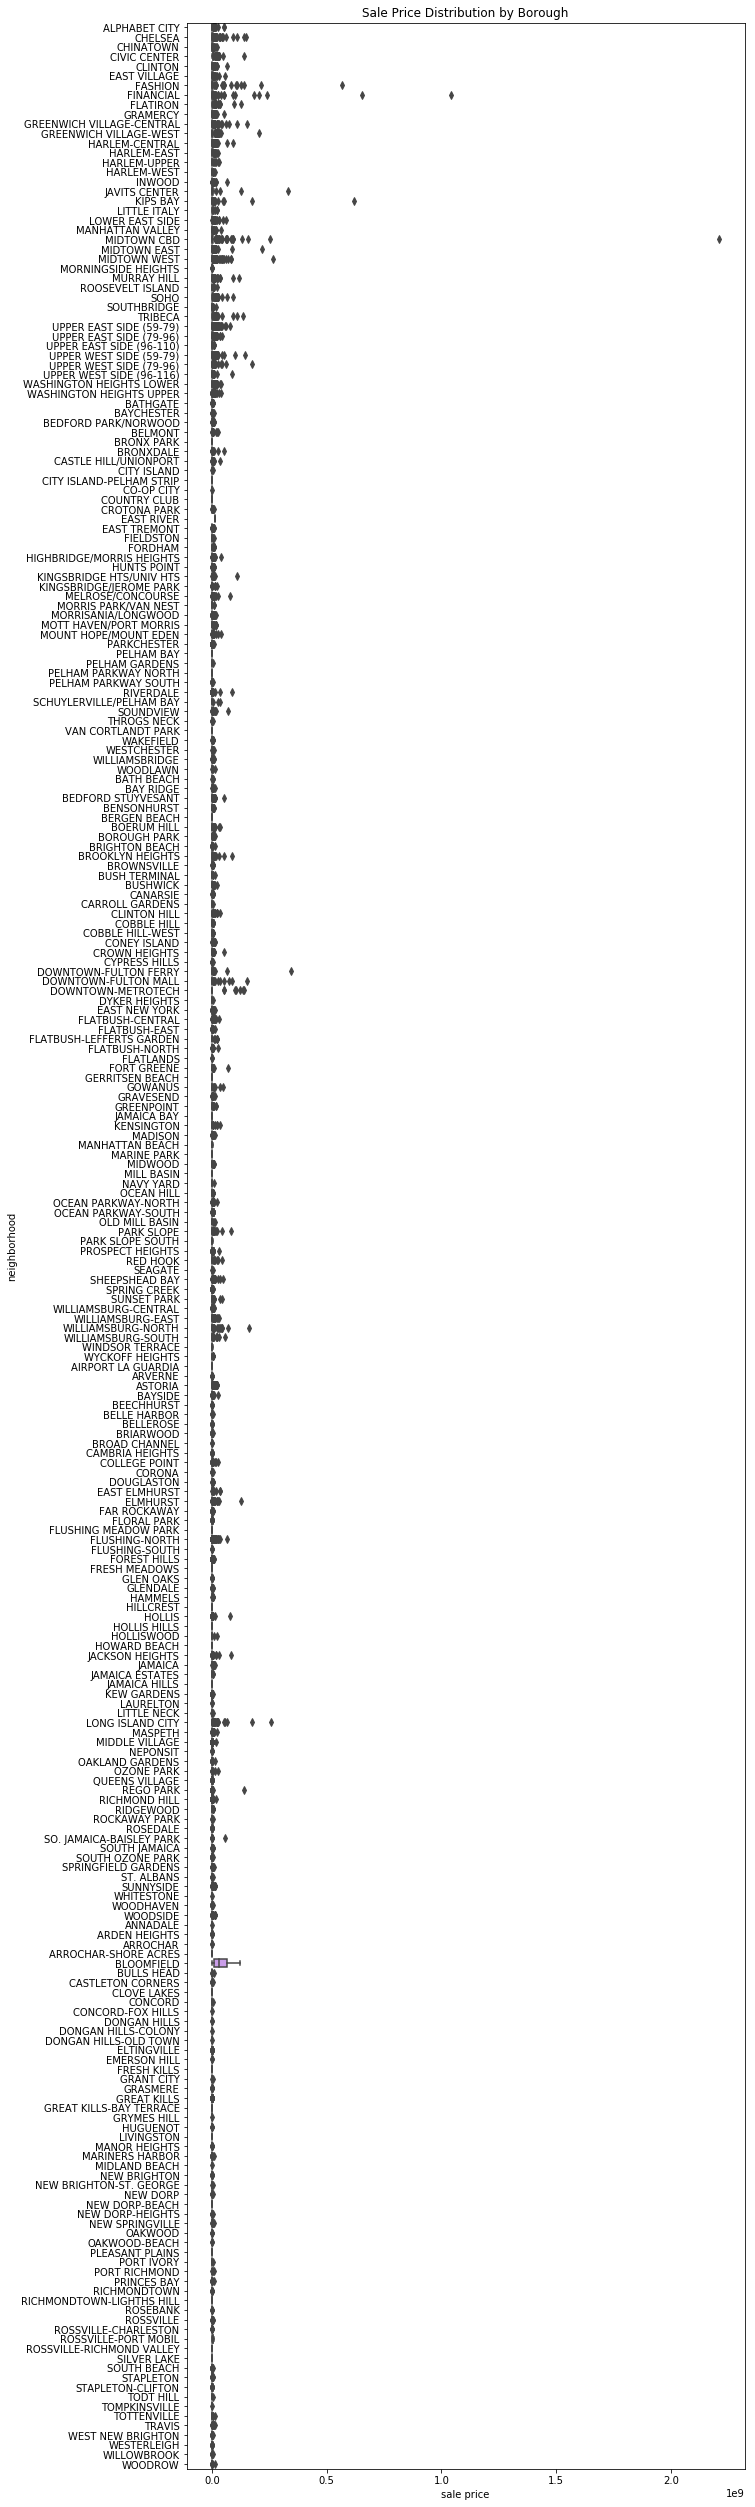

In [20]:
plt.figure(figsize=(10,45))
sns.boxplot(x='sale price', y='neighborhood', data=data)
plt.title('Sale Price Distribution by Borough')
plt.show()

In [46]:
data.columns = data.columns.str.lower()


In [55]:
# filter out data that has missing sale price
missing_sale_price=data[(data['sale price'].isnull()) | (data['sale price']<0.1)].copy()
missing_sale_price.tail()


,borough,neighborhood,building class category,tax class at present,block,lot,ease-ment,building class at present,address,apartment number,...,residential units,commercial units,total units,land square feet,gross square feet,year built,tax class at time of sale,building class at time of sale,sale price,sale date
84524,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7091,28,,B9,51 CLAY PIT ROAD,,...,2,0,2,2986.0,1820.0,1999,1,B9,NaN,2017-07-06
84525,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7091,188,,B9,1576 WOODROW ROAD,,...,2,0,2,2490.0,1530.0,1998,1,B9,NaN,2016-10-14
84538,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7316,61,,B2,178 DARNELL LANE,,...,2,0,2,3215.0,1300.0,1995,1,B2,NaN,2017-06-30
84539,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7316,85,,B2,137 DARNELL LANE,,...,2,0,2,3016.0,1300.0,1995,1,B2,NaN,2016-12-30
84542,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7339,41,,B9,41 SONIA COURT,,...,2,0,2,3020.0,1800.0,1997,1,B9,NaN,2016-12-01


In [68]:
#create data frame excluding records without sale price
df = data[data['sale price'].notnull() & data['sale price']>0.1].copy()
df.isnull().sum()/len(data)*100

borough                            0.000000
neighborhood                       0.000000
building class category            0.000000
tax class at present               0.000000
block                              0.000000
lot                                0.000000
ease-ment                          0.000000
building class at present          0.000000
address                            0.000000
apartment number                   0.000000
zip code                           0.000000
residential units                  0.000000
commercial units                   0.000000
total units                        0.000000
land square feet                  25.060321
gross square feet                 25.712022
year built                         0.000000
tax class at time of sale          0.000000
building class at time of sale     0.000000
sale price                         0.000000
sale date                          0.000000
dtype: float64

In [70]:
df[df['sale price']<0.1]

,borough,neighborhood,building class category,tax class at present,block,lot,ease-ment,building class at present,address,apartment number,...,residential units,commercial units,total units,land square feet,gross square feet,year built,tax class at time of sale,building class at time of sale,sale price,sale date


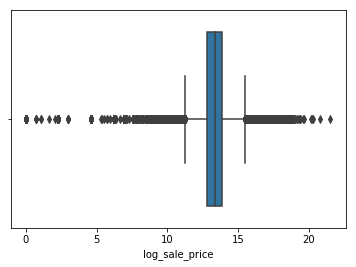

In [71]:
df['log_sale_price']=np.log(df['sale price'])
sns.boxplot(df['log_sale_price'])

# Data cleaning

In [73]:
df.head()

,borough,neighborhood,building class category,tax class at present,block,lot,ease-ment,building class at present,address,apartment number,...,commercial units,total units,land square feet,gross square feet,year built,tax class at time of sale,building class at time of sale,sale price,sale date,log_sale_price
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19,15.706361
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,15.185745
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17,15.894952
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,,...,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23,14.976421
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,,...,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07,16.602495


In [75]:
df.dtypes

borough                                    int64
neighborhood                              object
building class category                   object
tax class at present                      object
block                                      int64
lot                                        int64
ease-ment                                 object
building class at present                 object
address                                   object
apartment number                          object
zip code                                  object
residential units                          int64
commercial units                           int64
total units                                int64
land square feet                         float64
gross square feet                        float64
year built                                 int64
tax class at time of sale                  int64
building class at time of sale            object
sale price                               float64
sale date           

In [77]:
# check the relationship between land square feet and gross square feet
df[df['land square feet']!=df['gross square feet']].head()

,borough,neighborhood,building class category,tax class at present,block,lot,ease-ment,building class at present,address,apartment number,...,commercial units,total units,land square feet,gross square feet,year built,tax class at time of sale,building class at time of sale,sale price,sale date,log_sale_price
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19,15.706361
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,15.185745
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17,15.894952
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,,...,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23,14.976421
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,,...,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07,16.602495


In [90]:
df.groupby(['tax class at present'])['land square feet'].mean()

tax class at present
          0.000000
1      3019.932041
1A        0.000000
1B     6503.957031
1C        0.000000
2      2108.855087
2A     2549.459397
2B     2682.198068
2C        2.510553
4     21888.895161
Name: land square feet, dtype: float64

In [99]:
df[df['tax class at present']==' ']

,borough,neighborhood,building class category,tax class at present,block,lot,ease-ment,building class at present,address,apartment number,...,commercial units,total units,land square feet,gross square feet,year built,tax class at time of sale,building class at time of sale,sale price,sale date,log_sale_price
74,1,ALPHABET CITY,11A CONDO-RENTALS,,394,1602,,,183-189 AVENUE B,,...,0,0,NaN,NaN,0,2,RR,8058923.0,2017-08-09,15.902290
573,1,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,,699,1306,,,510 WEST 28TH STREET,,...,0,0,NaN,NaN,0,2,R4,7165843.0,2017-08-09,15.784836
574,1,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,,699,1309,,,510 WEST 28TH STREET,,...,0,0,NaN,NaN,0,2,R4,4937073.0,2017-08-02,15.412283
575,1,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,,699,1311,,,520 WEST 28TH STREET,,...,0,0,NaN,NaN,0,2,R4,6033271.0,2017-06-27,15.612800
576,1,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,,699,1316,,,520 WEST 28TH STREET,,...,0,0,NaN,NaN,0,2,R4,6198750.0,2017-06-26,15.639858
577,1,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,,699,1317,,,510 WEST 28TH STREET,,...,0,0,NaN,NaN,0,2,R4,14504000.0,2017-08-21,16.489935
578,1,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,,699,1319,,,510 WEST 28TH STREET,,...,0,0,NaN,NaN,0,2,R4,4987833.0,2017-07-26,15.422512
579,1,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,,699,1320,,,510 WEST 28TH STREET,,...,0,0,NaN,NaN,0,2,R4,5191483.0,2017-07-27,15.462530
580,1,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,,699,1321,,,510 WEST 28TH STREET,,...,0,0,NaN,NaN,0,2,R4,6398500.0,2017-07-28,15.671574
581,1,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,,699,1323,,,510 WEST 28TH STREET,,...,0,0,NaN,NaN,0,2,R4,9366308.0,2017-07-11,16.052630


In [119]:
df['ease-ment'].unique()

array([nan])

In [118]:
df[df['apartment number']==' ']

,borough,neighborhood,building class category,tax class at present,block,lot,ease-ment,building class at present,address,apartment number,...,commercial units,total units,land square feet,gross square feet,year built,tax class at time of sale,building class at time of sale,sale price,sale date,log_sale_price


In [110]:
#replace the space character with Nan
df = df.replace(' ', np.nan)

In [473]:
def MissingFinder(df):
    df = df.replace(' ', np.nan)
    num_nulls=df.isnull().sum()/len(df)*100
    num_nans=df[df == 0].count(axis=0)/len(df.index)*100

    return num_nulls,num_nans

In [474]:
nulls,zeros=MissingFinder(df)


In [475]:
nulls

borough                             0.000000
neighborhood                        0.000000
building class category             0.000000
tax class at present                0.992319
block                               0.000000
lot                                 0.000000
ease-ment                         100.000000
building class at present           0.992319
address                             0.000000
apartment number                   77.282083
zip code                            0.000000
residential units                   0.000000
commercial units                    0.000000
total units                         0.000000
land square feet                   35.455747
gross square feet                  36.377784
year built                          0.000000
tax class at time of sale           0.000000
building class at time of sale      0.000000
sale price                          0.000000
sale date                           0.000000
log_sale_price                      0.000000
dtype: flo

In [476]:
zeros

borough                            0.000000
neighborhood                       0.000000
building class category            0.000000
tax class at present               0.000000
block                              0.000000
lot                                0.000000
ease-ment                          0.000000
building class at present          0.000000
address                            0.000000
apartment number                   0.000000
zip code                           1.097743
residential units                 31.283991
commercial units                  95.272679
total units                       27.776569
land square feet                  13.718436
gross square feet                 14.535049
year built                         7.212303
tax class at time of sale          0.000000
building class at time of sale     0.000000
sale price                         0.000000
sale date                          0.000000
log_sale_price                     0.224234
dtype: float64

In [127]:
#split the data into training and validation set
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["borough"]):
    strat_train_set = df.loc[train_index]
    strat_validation_set = df.loc[test_index]

C:\Users\mailm_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  after removing the cwd from sys.path.
C:\Users\mailm_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """


In [130]:
#drop columns that are mostly blank

strat_train_set=strat_train_set.drop(columns=['ease-ment','apartment number'])

In [137]:
# impute the data for land square feet and gross square feet 
strat_train_set.groupby(['borough'])['land square feet'].mean()

borough
1.0    5744.080144
2.0    3468.210767
3.0    1975.611302
4.0    3991.488640
Name: land square feet, dtype: float64

In [141]:
#Look at the average value for land square fee
strat_train_set['land square feet'].mean()

2734.6266175544033

In [142]:
# pull out the year for the sale date
strat_train_set['sale year']= pd.to_datetime(strat_train_set['sale date']).dt.year

In [144]:
# calculate the age of the house
strat_train_set['age']=strat_train_set['sale year']-strat_train_set['year built']
strat_train_set.head()

,borough,neighborhood,building class category,tax class at present,block,lot,building class at present,address,zip code,residential units,...,land square feet,gross square feet,year built,tax class at time of sale,building class at time of sale,sale price,sale date,log_sale_price,sale year,age
47463,3.0,SUNSET PARK,15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,892.0,1205.0,R1,324 20TH STREET,11215.0,1.0,...,0.0,0.0,2015.0,2.0,R1,1275000.0,2017-02-23,14.058457,2017.0,2.0
3243,1.0,GRAMERCY,10 COOPS - ELEVATOR APARTMENTS,2,896.0,32.0,D4,"230 EAST 15 STREET, 8R",10003.0,0.0,...,NaN,NaN,1961.0,2.0,D4,499000.0,2017-07-12,13.120361,2017.0,56.0
43452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
1557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
7024,1.0,LOWER EAST SIDE,36 OUTDOOR RECREATIONAL FACILITIES,4,315.0,40.0,Q1,226 EAST BROADWAY,10002.0,0.0,...,6675.0,NaN,0.0,4.0,Q1,47500000.0,2016-10-27,17.676240,2016.0,2016.0


In [145]:
#find the percentage of missing values
strat_train_set.isna().sum()/len(strat_train_set)*100

borough                           29.225846
neighborhood                      29.225846
building class category           29.225846
tax class at present              30.123204
block                             29.225846
lot                               29.225846
building class at present         30.123204
address                           29.225846
zip code                          29.225846
residential units                 29.225846
commercial units                  29.225846
total units                       29.225846
land square feet                  56.841048
gross square feet                 57.062773
year built                        29.225846
tax class at time of sale         29.225846
building class at time of sale    29.225846
sale price                        29.225846
sale date                         29.225846
log_sale_price                    29.225846
sale year                         29.225846
age                               29.225846
dtype: float64

In [151]:
# remove duplicated rows (these rows having nothing but NaN in every column)
strat_train_set=strat_train_set.drop_duplicates()

In [153]:
# find the row that has nothing but NaN in all the columns
strat_train_set[strat_train_set['sale price'].isna()]

,borough,neighborhood,building class category,tax class at present,block,lot,building class at present,address,zip code,residential units,...,land square feet,gross square feet,year built,tax class at time of sale,building class at time of sale,sale price,sale date,log_sale_price,sale year,age
43452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN


In [157]:
# remove the row that only has missing values
strat_train_set=strat_train_set.dropna(how='all')


In [158]:
#view the features that still have missing data
strat_train_set.isna().sum()/len(strat_train_set)*100

borough                            0.000000
neighborhood                       0.000000
building class category            0.000000
tax class at present               1.271073
block                              0.000000
lot                                0.000000
building class at present          1.271073
address                            0.000000
zip code                           0.000000
residential units                  0.000000
commercial units                   0.000000
total units                        0.000000
land square feet                  39.068472
gross square feet                 39.382537
year built                         0.000000
tax class at time of sale          0.000000
building class at time of sale     0.000000
sale price                         0.000000
sale date                          0.000000
log_sale_price                     0.000000
sale year                          0.000000
age                                0.000000
dtype: float64

In [172]:
strat_train_set[strat_train_set['building class at present'].isna()].head()

,borough,neighborhood,building class category,tax class at present,block,lot,building class at present,address,zip code,residential units,...,land square feet,gross square feet,year built,tax class at time of sale,building class at time of sale,sale price,sale date,log_sale_price,sale year,age
35304,3.0,DOWNTOWN-FULTON FERRY,13 CONDOS - ELEVATOR APARTMENTS,NaN,41.0,1110.0,NaN,200 WATER STREET,0.0,0.0,...,0.0,0.0,0.0,2.0,R4,2975000.0,2017-02-23,14.905755,2017.0,2017.0
41065,3.0,GREENPOINT,44 CONDO PARKING,NaN,2562.0,1059.0,NaN,50 GREENPOINT AVENUE,11222.0,0.0,...,0.0,0.0,0.0,4.0,RP,25100.0,2017-08-04,10.130623,2017.0,2017.0
2934,1.0,FLATIRON,13 CONDOS - ELEVATOR APARTMENTS,NaN,851.0,2122.0,NaN,45 EAST 22ND STREET,0.0,0.0,...,NaN,NaN,0.0,2.0,R4,6801242.0,2017-08-03,15.732616,2017.0,2017.0
579,1.0,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,NaN,699.0,1320.0,NaN,510 WEST 28TH STREET,10001.0,0.0,...,NaN,NaN,0.0,2.0,R4,5191483.0,2017-07-27,15.462530,2017.0,2017.0
1696,1.0,CLINTON,13 CONDOS - ELEVATOR APARTMENTS,NaN,1073.0,1307.0,NaN,520 WEST 45TH STREET,10036.0,0.0,...,NaN,NaN,0.0,2.0,R4,2150000.0,2017-07-14,14.580978,2017.0,2017.0


In [171]:
strat_train_set.groupby(['building class category','tax class at present'])['tax class at present'].count()

building class category                       tax class at present
01 ONE FAMILY DWELLINGS                       1                       4357
                                              1B                         1
                                              2                          1
02 TWO FAMILY DWELLINGS                       1                       5045
                                              1B                         2
                                              2A                         1
03 THREE FAMILY DWELLINGS                     1                       1629
04 TAX CLASS 1 CONDOS                         1A                       489
                                              1C                       100
05 TAX CLASS 1 VACANT LAND                    1                          4
                                              1B                       220
                                              2B                         2
06 TAX CLASS 1 - OTHER           

In [175]:
strat_train_set.groupby(['building class category','building class at present'])['building class at present'].count()

building class category                      building class at present
01 ONE FAMILY DWELLINGS                      A0                            150
                                             A1                           1389
                                             A2                            577
                                             A3                             75
                                             A4                            113
                                             A5                           1361
                                             A6                             12
                                             A7                              6
                                             A9                            542
                                             B3                              1
                                             D3                              1
                                             S0             

In [181]:
#impute the missing values for building class at present and tax class at present
values={'building class at present': 2, 'tax class at present': 'RG'}
strat_train_set=strat_train_set.fillna(value=values)


In [182]:
#check to see what else needs to be imputed
strat_train_set.isna().sum()/len(strat_train_set)*100

borough                            0.000000
neighborhood                       0.000000
building class category            0.000000
tax class at present               0.000000
block                              0.000000
lot                                0.000000
building class at present          0.000000
address                            0.000000
zip code                           0.000000
residential units                  0.000000
commercial units                   0.000000
total units                        0.000000
land square feet                  39.068472
gross square feet                 39.382537
year built                         0.000000
tax class at time of sale          0.000000
building class at time of sale     0.000000
sale price                         0.000000
sale date                          0.000000
log_sale_price                     0.000000
sale year                          0.000000
age                                0.000000
dtype: float64

In [184]:
#create a table of correlations between all features and median house value
corr_matrix=strat_train_set.corr()
corr_matrix['sale price'].sort_values(ascending=False)

sale price                   1.000000
gross square feet            0.700543
total units                  0.209218
residential units            0.180168
log_sale_price               0.164946
commercial units             0.143960
land square feet             0.136296
tax class at time of sale    0.104562
age                          0.001289
lot                          0.001041
year built                  -0.001292
sale year                   -0.003761
zip code                    -0.033162
borough                     -0.061779
block                       -0.061878
Name: sale price, dtype: float64

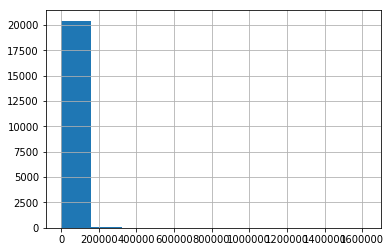

In [190]:
strat_train_set['gross square feet'].hist()

In [189]:
# Look at year built and why the age of some homes is zero: no year built
strat_train_set[strat_train_set['year built']<=1750]

,borough,neighborhood,building class category,tax class at present,block,lot,building class at present,address,zip code,residential units,...,land square feet,gross square feet,year built,tax class at time of sale,building class at time of sale,sale price,sale date,log_sale_price,sale year,age
7024,1.0,LOWER EAST SIDE,36 OUTDOOR RECREATIONAL FACILITIES,4,315.0,40.0,Q1,226 EAST BROADWAY,10002.0,0.0,...,6675.0,NaN,0.0,4.0,Q1,47500000.0,2016-10-27,17.676240,2016.0,2016.0
48247,3.0,WILLIAMSBURG-EAST,41 TAX CLASS 4 - OTHER,4,3062.0,36.0,Z9,187 JOHNSON AVENUE,11206.0,0.0,...,2500.0,0.0,0.0,4.0,Z9,1567000.0,2017-07-07,14.264674,2017.0,2017.0
1092,1.0,CHINATOWN,43 CONDO OFFICE BUILDINGS,4,201.0,1062.0,RB,13-17 ELIZABETH STREET,10013.0,0.0,...,NaN,NaN,0.0,4.0,RB,280000.0,2016-10-31,12.542545,2016.0,2016.0
46893,3.0,SPRING CREEK,31 COMMERCIAL VACANT LAND,4,4586.0,200.0,V1,FOUNTAIN AVENUE,11208.0,0.0,...,208559.0,0.0,0.0,4.0,V1,3750000.0,2016-10-17,15.137266,2016.0,2016.0
16214,1.0,UPPER WEST SIDE (59-79),17 CONDO COOPS,2,1115.0,1506.0,R9,"61 WEST 62 STREET, 22N",10023.0,0.0,...,NaN,NaN,0.0,2.0,R9,750000.0,2017-06-23,13.527828,2017.0,2017.0
17750,1.0,UPPER WEST SIDE (96-116),13 CONDOS - ELEVATOR APARTMENTS,2,1869.0,1106.0,R4,780 WEST END AVENUE,10025.0,1.0,...,NaN,NaN,0.0,2.0,R4,3050000.0,2017-08-08,14.930652,2017.0,2017.0
9067,1.0,MIDTOWN WEST,13 CONDOS - ELEVATOR APARTMENTS,2,1003.0,1221.0,R4,150 WEST 51ST STREET,10019.0,1.0,...,NaN,NaN,0.0,2.0,R4,899000.0,2016-09-14,13.709038,2016.0,2016.0
48526,3.0,WILLIAMSBURG-NORTH,13 CONDOS - ELEVATOR APARTMENTS,2,2350.0,1055.0,R4,85 NORTH 3RD STREET,11249.0,1.0,...,0.0,0.0,0.0,2.0,R4,2800000.0,2016-12-01,14.845130,2016.0,2016.0
6273,1.0,INWOOD,13 CONDOS - ELEVATOR APARTMENTS,2,2221.0,1136.0,R4,571 ACADEMY STREET,10034.0,1.0,...,NaN,NaN,0.0,2.0,R4,450000.0,2017-04-05,13.017003,2017.0,2017.0
44999,3.0,PARK SLOPE,15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,960.0,1008.0,R1,705 CARROLL STREET,11215.0,1.0,...,0.0,0.0,0.0,2.0,R1,1030000.0,2017-05-25,13.845069,2017.0,2017.0


In [235]:
# figure out what to do when the year built is missing
# see how many records have year built missing
strat_train_set.groupby(['neighborhood','building class category'])['year built'].agg(lambda x: x.eq(0).sum())

neighborhood        building class category                     
AIRPORT LA GUARDIA  01 ONE FAMILY DWELLINGS                         0.0
                    03 THREE FAMILY DWELLINGS                       0.0
                    07 RENTALS - WALKUP APARTMENTS                  0.0
                    12 CONDOS - WALKUP APARTMENTS                   2.0
ALPHABET CITY       07 RENTALS - WALKUP APARTMENTS                  0.0
                    09 COOPS - WALKUP APARTMENTS                    0.0
                    10 COOPS - ELEVATOR APARTMENTS                  0.0
                    11A CONDO-RENTALS                               0.0
                    12 CONDOS - WALKUP APARTMENTS                   1.0
                    13 CONDOS - ELEVATOR APARTMENTS                 3.0
                    14 RENTALS - 4-10 UNIT                          0.0
                    15 CONDOS - 2-10 UNIT RESIDENTIAL               3.0
                    16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT      0.0

In [236]:
# figure out what to do when the year built is missing
# look at the average year built by neighborhood and building category
strat_train_set.groupby(['neighborhood','building class category'])['year built'].mean()

neighborhood        building class category                     
AIRPORT LA GUARDIA  01 ONE FAMILY DWELLINGS                         1950.000000
                    03 THREE FAMILY DWELLINGS                       1940.000000
                    07 RENTALS - WALKUP APARTMENTS                  1971.000000
                    12 CONDOS - WALKUP APARTMENTS                      0.000000
ALPHABET CITY       07 RENTALS - WALKUP APARTMENTS                  1911.000000
                    09 COOPS - WALKUP APARTMENTS                    1919.022222
                    10 COOPS - ELEVATOR APARTMENTS                  1930.000000
                    11A CONDO-RENTALS                               1997.000000
                    12 CONDOS - WALKUP APARTMENTS                      0.000000
                    13 CONDOS - ELEVATOR APARTMENTS                 1852.818182
                    14 RENTALS - 4-10 UNIT                          1906.666667
                    15 CONDOS - 2-10 UNIT RESIDENTIAL  

In [294]:
# figure out what to do when the year built is missing
#look at the same data as above but replace 0's in year built with NaN
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
#copy_strat=strat_train_set.copy()
strat_train_set['year built']=strat_train_set['year built'].replace(0, np.nan)


neighborhood              building class category                     
AIRPORT LA GUARDIA        01 ONE FAMILY DWELLINGS                         1950.000000
                          03 THREE FAMILY DWELLINGS                       1940.000000
                          07 RENTALS - WALKUP APARTMENTS                  1971.000000
                          12 CONDOS - WALKUP APARTMENTS                           NaN
ALPHABET CITY             07 RENTALS - WALKUP APARTMENTS                  1911.000000
                          09 COOPS - WALKUP APARTMENTS                    1919.022222
                          10 COOPS - ELEVATOR APARTMENTS                  1930.000000
                          11A CONDO-RENTALS                               1997.000000
                          12 CONDOS - WALKUP APARTMENTS                           NaN
                          13 CONDOS - ELEVATOR APARTMENTS                 1988.390244
                          14 RENTALS - 4-10 UNIT                     

In [296]:
#Look at the average value for year built by neighborhood
yr_blt=pd.DataFrame(strat_train_set.groupby(['neighborhood'])['year built'].mean()).reset_index()
#year_built_lookup=year_built_lookup.set_index('neighborhood')['year built']

yr_blt.head()


# this is a simpler solution

,neighborhood,year built
0,AIRPORT LA GUARDIA,1394.428571
1,ALPHABET CITY,1835.576271
2,ARVERNE,1845.187500
3,ASTORIA,1839.950749
4,BATH BEACH,1775.637795


### Impute year built

In [297]:
#replance NaN values with the average year values from lookup table

strat_train_set['year built']=np.where(strat_train_set['year built'].isna(),strat_train_set.neighborhood.map(yr_blt.set_index('neighborhood')['year built']),strat_train_set['year built'])


In [290]:
#create function to replace NaN values with a lookup table
#lookup table must be already defined
def ReplaceNaNLookup(df,lookup_tbl,lookup_val,replace_val):
    df[replace_val]=np.where(df[replace_val].isna(),df[lookup_val].map(lookup_tbl.set_index(lookup_val)[replace_val]),df[replace_val])
    return df

    
    

In [298]:
#Run the Replace NaN lookup function on the data
lookup_val='neighborhood'
replace_val='year built'
strat_train_set=ReplaceNaNLookup(strat_train_set,yr_blt,lookup_val,replace_val)
strat_train_set.isna().sum()

borough                               0
neighborhood                          0
building class category               0
tax class at present                  0
block                                 0
lot                                   0
building class at present             0
address                               0
zip code                              0
residential units                     0
commercial units                      0
total units                           0
land square feet                  13186
gross square feet                 13292
year built                            0
tax class at time of sale             0
building class at time of sale        0
sale price                            0
sale date                             0
log_sale_price                        0
sale year                             0
age                                   0
dtype: int64

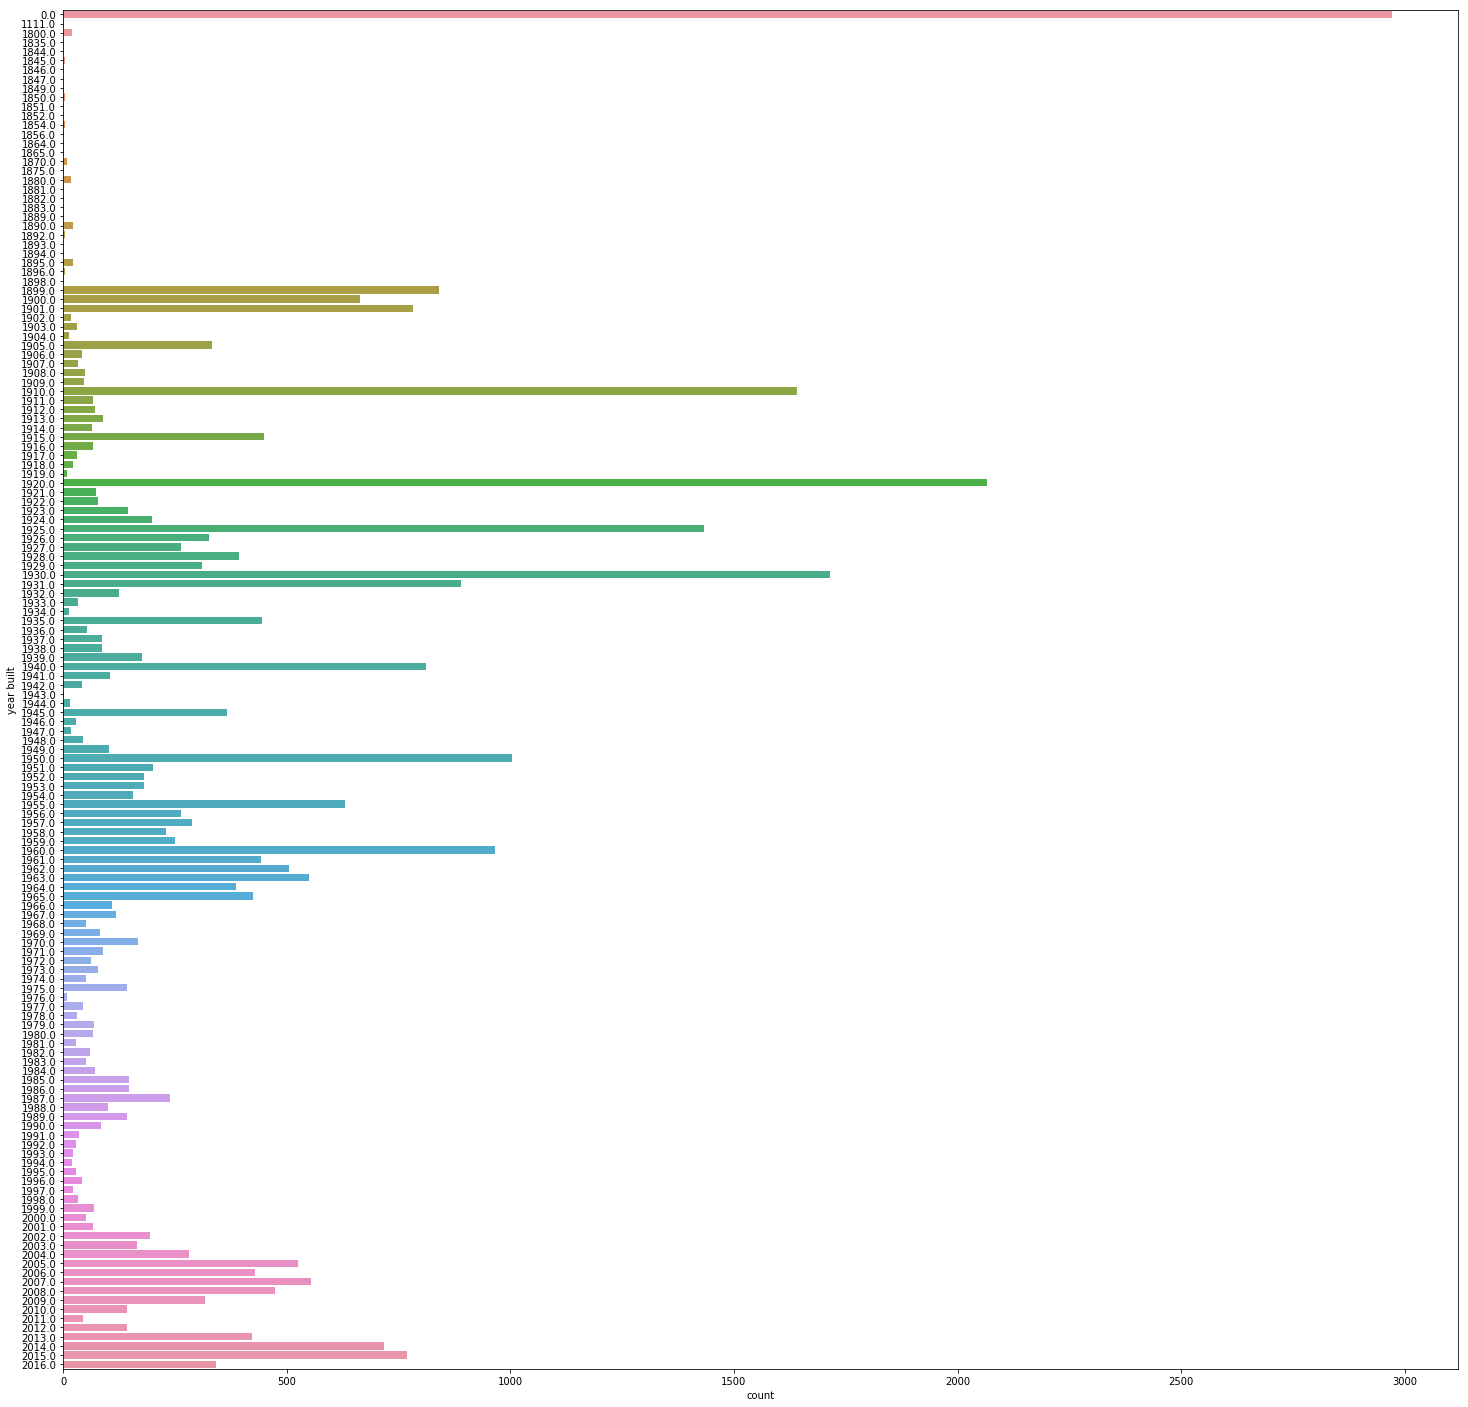

In [231]:
plt.figure(figsize=(25,25))
sns.countplot(data=strat_train_set,y='year built')

### Impute Land Square feet

In [191]:
#Figure out how to impute land square feet when it is missing
#let look at the relationship between building class category and land square feet
strat_train_set.groupby('building class category')['land square feet'].mean()

building class category
01 ONE FAMILY DWELLINGS                          2992.770590
02 TWO FAMILY DWELLINGS                          2519.587956
03 THREE FAMILY DWELLINGS                        2396.545734
04 TAX CLASS 1 CONDOS                               0.000000
05 TAX CLASS 1 VACANT LAND                       4933.265487
06 TAX CLASS 1 - OTHER                           2476.080000
07 RENTALS - WALKUP APARTMENTS                   3448.348855
08 RENTALS - ELEVATOR APARTMENTS                22645.150327
09 COOPS - WALKUP APARTMENTS                      887.881944
10 COOPS - ELEVATOR APARTMENTS                    290.227212
11A CONDO-RENTALS                                8807.636364
12 CONDOS - WALKUP APARTMENTS                       0.000000
13 CONDOS - ELEVATOR APARTMENTS                     0.000000
14 RENTALS - 4-10 UNIT                           2160.924000
15 CONDOS - 2-10 UNIT RESIDENTIAL                   0.000000
16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT          0.000000


In [344]:
condo_values=5540.250000
copy_df=df.copy()

copy_df['building class category'] = copy_df['building class category'].map(lambda x: x.strip())

copy_df.loc[((copy_df['land square feet'].isna()) & (copy_df['building class category'] == '04 TAX CLASS 1 CONDOS'), 'land square feet')]=condo_values

copy_df.loc[((copy_df['land square feet'].isna()) & (copy_df['building class category'] == '12 CONDOS - WALKUP APARTMENTS'), 'land square feet')]=3811.59
copy_df.loc[((copy_df['land square feet'].isna()) & (copy_df['building class category'] == '13 CONDOS - ELEVATOR APARTMENTS'), 'land square feet')]=21584.71

copy_df.loc[((copy_df['land square feet'].isna()) & (copy_df['building class category'] == '15 CONDOS - 2-10 UNIT RESIDENTIAL'), 'land square feet')]=2280.38
copy_df.loc[((copy_df['land square feet'].isna()) & (copy_df['building class category'] == '16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT'), 'land square feet')]=2280.38
copy_df.loc[((copy_df['land square feet'].isna()) & (copy_df['building class category'] == '17 CONDO COOPS'), 'land square feet')]=2280.38

copy_df.loc[((copy_df['land square feet'].isna()) & (copy_df['building class category'] == '28 COMMERCIAL CONDOS'), 'land square feet')]=5635.45

copy_df.loc[((copy_df['land square feet'].isna()) & (copy_df['building class category'] == '42 CONDO CULTURAL/MEDICAL/EDUCATIONAL/ETC'), 'land square feet')]=11361.05
copy_df.loc[((copy_df['land square feet'].isna()) & (copy_df['building class category'] == '43 CONDO OFFICE BUILDINGS'), 'land square feet')]=9074.36
copy_df.loc[((copy_df['land square feet'].isna()) & (copy_df['building class category'] == '44 CONDO PARKING'), 'land square feet')]=10003.00
copy_df.loc[((copy_df['land square feet'].isna()) & (copy_df['building class category'] == '45 CONDO HOTELS'), 'land square feet')]=9327.50
copy_df.loc[((copy_df['land square feet'].isna()) & (copy_df['building class category'] == '46 CONDO STORE BUILDINGS'), 'land square feet')]=25772
copy_df.loc[((copy_df['land square feet'].isna()) & (copy_df['building class category'] == '47 CONDO NON-BUSINESS STORAGE'), 'land square feet')]=19797
copy_df.loc[((copy_df['land square feet'].isna()) & (copy_df['building class category'] == '48 CONDO TERRACES/GARDENS/CABANAS'), 'land square feet')]=53525.83
copy_df.loc[((copy_df['land square feet'].isna()) & (copy_df['building class category'] == '49 CONDO WAREHOUSES/FACTORY/INDUS'), 'land square feet')]=19797.77


In [320]:
#Create a lookup table for land square feet
landsqft_lookup=pd.DataFrame(copy_df.groupby('building class category')['land square feet'].mean()).reset_index()
landsqft_lookup

,building class category,land square feet
0,01 ONE FAMILY DWELLINGS,3248.043288
1,02 TWO FAMILY DWELLINGS,2860.843048
2,03 THREE FAMILY DWELLINGS,2461.174327
3,04 TAX CLASS 1 CONDOS,3115.575882
4,05 TAX CLASS 1 VACANT LAND,6454.713733
5,06 TAX CLASS 1 - OTHER,3144.760000
6,07 RENTALS - WALKUP APARTMENTS,3811.590355
7,08 RENTALS - ELEVATOR APARTMENTS,21584.712919
8,09 COOPS - WALKUP APARTMENTS,1546.003597
9,10 COOPS - ELEVATOR APARTMENTS,1970.966853


In [457]:
#create function to replace NaN values with a lookup table
#lookup table must be already defined
def ImputeLandSqFt(df,lookup_tbl=landsqft_lookup,lookup_val='building class category',replace_val='land square feet'):
    df.loc[df[replace_val].isna(),replace_val]=df[lookup_val].map(lookup_tbl.set_index(lookup_val)[replace_val])
    return df

In [ ]:
#create function to remove leading and trailing spaces from a  dataframe
def RemoveLeadingTrailingSpace(df):
    df=df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
    return df

In [326]:
#test my functions to make sure they work on a copy of the data
df_copy_B=strat_train_set.copy()

df_copy_B=RemoveLeadingTrailingSpace(df_copy_B)
df_copy_B=ImputeLandSqFt(df_copy_B)

In [335]:
df_copy_B.groupby('building class category')['land square feet'].mean()

building class category
01 ONE FAMILY DWELLINGS                        2992.770590
02 TWO FAMILY DWELLINGS                        2519.587956
03 THREE FAMILY DWELLINGS                      2396.545734
04 TAX CLASS 1 CONDOS                          3115.575882
05 TAX CLASS 1 VACANT LAND                     4961.826167
06 TAX CLASS 1 - OTHER                         2476.080000
07 RENTALS - WALKUP APARTMENTS                 3448.348855
08 RENTALS - ELEVATOR APARTMENTS              22786.226882
09 COOPS - WALKUP APARTMENTS                   2415.991981
10 COOPS - ELEVATOR APARTMENTS                 2248.048443
11A CONDO-RENTALS                             12582.337662
12 CONDOS - WALKUP APARTMENTS                  1643.320240
13 CONDOS - ELEVATOR APARTMENTS               15901.904303
14 RENTALS - 4-10 UNIT                         2160.924000
15 CONDOS - 2-10 UNIT RESIDENTIAL               560.246910
16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT     1380.230000
17 CONDO COOPS                  

In [458]:
#run the functions on the stratified training data
#test my functions to make sure they work on a copy of the data

strat_train_set=RemoveLeadingTrailingSpace(strat_train_set)
strat_train_set=ImputeLandSqFt(strat_train_set)
strat_train_set.groupby('building class category')['land square feet'].mean()

building class category
01 ONE FAMILY DWELLINGS                        2992.770590
02 TWO FAMILY DWELLINGS                        2519.587956
03 THREE FAMILY DWELLINGS                      2396.545734
04 TAX CLASS 1 CONDOS                          3115.575882
05 TAX CLASS 1 VACANT LAND                     4961.826167
06 TAX CLASS 1 - OTHER                         2476.080000
07 RENTALS - WALKUP APARTMENTS                 3448.348855
08 RENTALS - ELEVATOR APARTMENTS              22786.226882
09 COOPS - WALKUP APARTMENTS                   1827.527928
10 COOPS - ELEVATOR APARTMENTS                 2055.554405
11A CONDO-RENTALS                             11369.040816
12 CONDOS - WALKUP APARTMENTS                  1643.320240
13 CONDOS - ELEVATOR APARTMENTS               15901.904303
14 RENTALS - 4-10 UNIT                         2160.924000
15 CONDOS - 2-10 UNIT RESIDENTIAL               560.246910
16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT     1380.230000
17 CONDO COOPS                  

### Impute Gross Square feet

In [336]:
#Figure out how to impute land square feet when it is missing
#let look at the relationship between building class category and land square feet
strat_train_set.groupby('building class category')['gross square feet'].mean()

building class category
01 ONE FAMILY DWELLINGS                           1648.914371
02 TWO FAMILY DWELLINGS                           2246.424916
03 THREE FAMILY DWELLINGS                         2938.440761
04 TAX CLASS 1 CONDOS                                0.000000
05 TAX CLASS 1 VACANT LAND                          87.768817
06 TAX CLASS 1 - OTHER                             219.040000
07 RENTALS - WALKUP APARTMENTS                    8620.939695
08 RENTALS - ELEVATOR APARTMENTS                 86042.457516
09 COOPS - WALKUP APARTMENTS                       488.541667
10 COOPS - ELEVATOR APARTMENTS                    1127.233437
11A CONDO-RENTALS                                25331.333333
12 CONDOS - WALKUP APARTMENTS                        0.000000
13 CONDOS - ELEVATOR APARTMENTS                      0.000000
14 RENTALS - 4-10 UNIT                            4693.216867
15 CONDOS - 2-10 UNIT RESIDENTIAL                    0.000000
16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT    

In [349]:
copy_df['building class category'] = copy_df['building class category'].map(lambda x: x.strip())

copy_df.loc[((copy_df['gross square feet'].isna()) & (copy_df['building class category'] == '04 TAX CLASS 1 CONDOS'), 'gross square feet')]=37661.56

copy_df.loc[((copy_df['gross square feet'].isna()) & (copy_df['building class category'] == '12 CONDOS - WALKUP APARTMENTS'), 'gross square feet')]=8620
copy_df.loc[((copy_df['gross square feet'].isna()) & (copy_df['building class category'] == '13 CONDOS - ELEVATOR APARTMENTS'), 'gross square feet')]=86042.45

copy_df.loc[((copy_df['gross square feet'].isna()) & (copy_df['building class category'] == '15 CONDOS - 2-10 UNIT RESIDENTIAL'), 'gross square feet')]=37661.56
copy_df.loc[((copy_df['gross square feet'].isna()) & (copy_df['building class category'] == '16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT'), 'gross square feet')]=37661.56
copy_df.loc[((copy_df['gross square feet'].isna()) & (copy_df['building class category'] == '39 TRANSPORTATION FACILITIES'), 'gross square feet')]=19332.79

copy_df.loc[((copy_df['gross square feet'].isna()) & (copy_df['building class category'] == '28 COMMERCIAL CONDOS'), 'gross square feet')]=37661.565

copy_df.loc[((copy_df['gross square feet'].isna()) & (copy_df['building class category'] == '42 CONDO CULTURAL/MEDICAL/EDUCATIONAL/ETC'), 'gross square feet')]=13111.75
copy_df.loc[((copy_df['gross square feet'].isna()) & (copy_df['building class category'] == '43 CONDO OFFICE BUILDINGS'), 'gross square feet')]=65548.10
copy_df.loc[((copy_df['gross square feet'].isna()) & (copy_df['building class category'] == '44 CONDO PARKING'), 'gross square feet')]=5088.64
copy_df.loc[((copy_df['gross square feet'].isna()) & (copy_df['building class category'] == '45 CONDO HOTELS'), 'gross square feet')]=201263
copy_df.loc[((copy_df['gross square feet'].isna()) & (copy_df['building class category'] == '46 CONDO STORE BUILDINGS'), 'gross square feet')]=7953.89
copy_df.loc[((copy_df['gross square feet'].isna()) & (copy_df['building class category'] == '47 CONDO NON-BUSINESS STORAGE'), 'gross square feet')]=19332.79
copy_df.loc[((copy_df['gross square feet'].isna()) & (copy_df['building class category'] == '48 CONDO TERRACES/GARDENS/CABANAS'), 'gross square feet')]=13700
copy_df.loc[((copy_df['gross square feet'].isna()) & (copy_df['building class category'] == '49 CONDO WAREHOUSES/FACTORY/INDUS'), 'gross square feet')]=13111


In [437]:
#Create a lookup table for gross square feet
copy_df['gross square feet'].replace(0, np.nan, inplace=True)
gross_sqft_lookup=pd.DataFrame(copy_df.groupby('building class category')['gross square feet'].mean()).reset_index()
gross_sqft_lookup

,building class category,gross square feet
0,01 ONE FAMILY DWELLINGS,1552.084526
1,02 TWO FAMILY DWELLINGS,2151.028119
2,03 THREE FAMILY DWELLINGS,2893.370894
3,04 TAX CLASS 1 CONDOS,37661.560000
4,05 TAX CLASS 1 VACANT LAND,3048.333333
5,06 TAX CLASS 1 - OTHER,715.538462
6,07 RENTALS - WALKUP APARTMENTS,8454.518026
7,08 RENTALS - ELEVATOR APARTMENTS,82739.403846
8,09 COOPS - WALKUP APARTMENTS,40368.363636
9,10 COOPS - ELEVATOR APARTMENTS,289915.333333


In [455]:
#create function to replace NaN values with a lookup table
#lookup table must be already defined
def ImputeGrossSqFt(df,lookup_tbl=gross_sqft_lookup,lookup_val='building class category',replace_val='gross square feet'):
    df.loc[df[replace_val].isna(),replace_val]=df[lookup_val].map(lookup_tbl.set_index(lookup_val)[replace_val])
    
    return df

In [459]:
#Run function to impute gross square feet

strat_train_set=ImputeGrossSqFt(strat_train_set)
strat_train_set.isna().sum()



borough                             0
neighborhood                        0
building class category             0
tax class at present                0
block                               0
lot                                 0
building class at present         429
address                             0
zip code                            0
residential units                   0
commercial units                    0
total units                         0
land square feet                    0
gross square feet                   0
year built                          0
tax class at time of sale           0
building class at time of sale      0
sale price                          0
sale date                           0
log_sale_price                      0
sale year                           0
age                                 0
dtype: int64

In [527]:
a=pd.DataFrame(strat_train_set.groupby(['building class category','building class at present']).size().reset_index())
a.columns = ['building class category','building class at present','count'] 
a.sort_values(by=['building class category', 'count'],ascending=[True, False])

,building class category,building class at present,count
1,01 ONE FAMILY DWELLINGS,A1,1389
5,01 ONE FAMILY DWELLINGS,A5,1361
2,01 ONE FAMILY DWELLINGS,A2,577
8,01 ONE FAMILY DWELLINGS,A9,542
0,01 ONE FAMILY DWELLINGS,A0,150
12,01 ONE FAMILY DWELLINGS,S1,129
4,01 ONE FAMILY DWELLINGS,A4,113
3,01 ONE FAMILY DWELLINGS,A3,75
6,01 ONE FAMILY DWELLINGS,A6,12
7,01 ONE FAMILY DWELLINGS,A7,6
